<table style="width: 100%; border-collapse: collapse;" border="0">
<tr>
<td><b>Created:</b> Tuesday 31 January 2017</td>
<td style="text-align: right;"><a href="https://www.github.com/rhyswhitley/fire_limitation">github.com/rhyswhitley/fire_limitation</td>
</tr>
</table>

<div>
<center>
<font face="Times">
<br>
<h1>Quantifying the uncertainity of a global fire limitation model using Bayesian inference</h1>
<h2>Part 3: Data visualisation</h2>
<br>
<br>
<sup>1,* </sup>Douglas Kelley, 
<sup>2 </sup>Ioannis Bistinas, 
<sup>3, 4 </sup>Chantelle Burton, 
<sup>1 </sup><s>Tobias Marthews,</s>
<sup>5 </sup>Rhys Whitley
<br>
<br>
<br>
<sup>1 </sup>Centre for Ecology and Hydrology, Maclean Building, Crowmarsh Gifford, Wallingford, Oxfordshire, United Kingdom
<br>
<sup>2 </sup>Vrije Universiteit Amsterdam, Faculty of Earth and Life Sciences, Amsterdam, Netherlands
<br>
<sup>3 </sup>Met Office United Kingdom, Exeter, United Kingdom
<br>
<sup>4 </sup>Geography, University of Exeter, Exeter, United Kingdom
<br>
<sup>5 </sup>Natural Perils Pricing, Commercial & Consumer Portfolio & Pricing, Suncorp Group, Sydney, Australia
<br>

### Load libraries

In [17]:
# data munging and analytical libraries 
import re
import os
import numpy as np
import pandas as pd

# graphical libraries
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# default plot settings for notebook
from IPython.core.pylabtools import figsize
figsize(11, 9)
plt.style.use('ggplot')

%matplotlib inline

### Import data

In [2]:
DATAPATH = os.path.expanduser("../data/globfire.csv.gz")

fd = pd.read_csv(DATAPATH)

### Function definitions

In [3]:
def lightning(flash):
    """
    Transform flashes to some lightning measure 
    """
    return flash*min(1.0, 0.0408*flash**(-0.4180))

def ignition(lightning, pasture_area, pop_density, kp, kd1):
    """
    Definition for the measure of ignition
    """
    return lightning + kp*pasture_area + kd1*pop_density

def supression(urban_area, crop_area, pop_density, kc, kd2):
    """
    Definition for the measure of fire supression
    """
    return urban_area + kc*crop_area + kd2*pop_density

def np_sigmoid(x, a, b):
    """
    Sigmoid function to describe limitation using tensor
    """
    return 1.0/(1.0 + np.exp(a*x + b))

### Extra model covariates determined

In [4]:
fd['x_light'] = [lightning(x) if x > 0 else 0 for x in fd['lightning_ignitions'].values]

Determine the ignition and supression covariates as per the model documentation

In [5]:
fd['ignite'] = ignition(fd["x_light"].values, \
               fd["pasture"].values, \
               fd["population_density"].values, \
               500, 10)

fd['suppress'] = supression(fd["urban_area"].values, \
                 fd["cropland"].values, \
                 fd["population_density"].values, \
                 500, 10)

## Data viz below

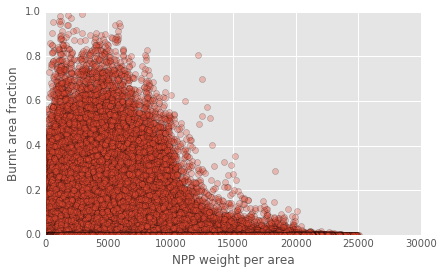

In [18]:
plt.plot(fd.NPP, fd.fire, 'o', alpha=0.3)
plt.ylabel("Burnt area fraction")
plt.xlabel("NPP weight per area");

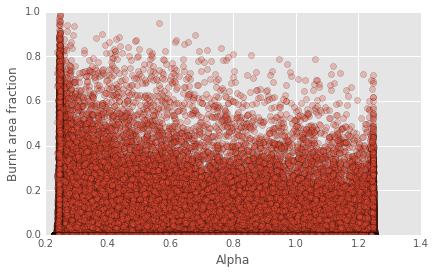

In [13]:
plt.plot(fd.alpha, fd.fire, 'o', alpha=0.3)
plt.ylabel("Burnt area fraction")
plt.xlabel("Alpha")
plt.show()